# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Friday, October 24, 2025, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
   - Solve a supervised learning problem using a multilayer perceptron (MLP).

2. **Mission 2.2 (Unsupervised Learning)**:
   - Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  

> Good luck, comrade!

In [685]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a multilayer perceptron (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering.
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Improve performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning hyperparameters.

> Note: There are no restrictions on the tricks you can use — Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92** accuracy on the test set.

3. **Discussion**:
   - How can you make sure the results are reproduable?
   - Visualize the network's architecture and decision boundary.
   - Which optimizer did you choose? Discuss the differences between SGD and Adam.
   - Plot the learning rate curve. Did the learning rate scheduling improve performance? Why or why not?
   - Conduct a simple ablation study of each architectural and optimization choice concerning test accuracy.

In [686]:
data = pd.read_csv('nn_data.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

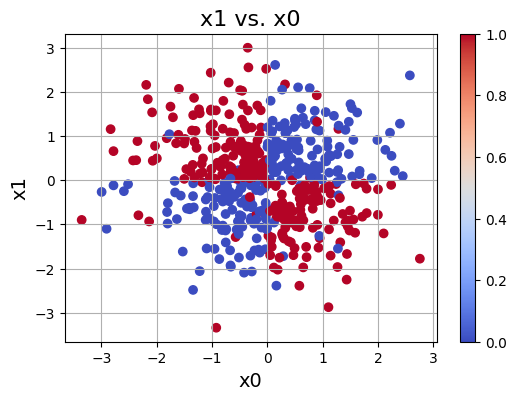

In [687]:
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('x1 vs. x0', fontsize=16)
plt.colorbar()
plt.show()

In [688]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [689]:
import os, random
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)   
os.environ["TF_DETERMINISTIC_OPS"] = "1"   


import tensorflow as tf
tf.keras.utils.set_random_seed(SEED)       
np.random.seed(SEED)
random.seed(SEED)

In [690]:
Firstmodel = Sequential([
    Dense(4, activation="relu", input_shape=(4,)),
    Dense(2, activation="softmax"),
    Dense(2, activation="softmax"),
])

c:\Users\hanev\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [691]:
X_train = train[["x0","x1"]].to_numpy().astype("float32")
X_test  = test[["x0","x1"]].to_numpy().astype("float32")

# x0*x1
xprod_train = (X_train[:,0] * X_train[:,1]).reshape(-1,1)
xprod_test  = (X_test[:,0]  * X_test[:,1]).reshape(-1,1)

# tan(theta) = tan(atan2(x1, x0))
theta_train = np.arctan2(X_train[:,1], X_train[:,0])
theta_test  = np.arctan2(X_test[:,1],  X_test[:,0])

tan_train = np.tan(theta_train).reshape(-1,1)
tan_test  = np.tan(theta_test).reshape(-1,1)

# samle alt: x0, x1, x0*x1, tan(theta)
X_train = np.c_[X_train, xprod_train, tan_train].astype("float32")
X_test  = np.c_[X_test,  xprod_test,  tan_test ].astype("float32")

y_train = train["y"].to_numpy().astype("int32")
y_test  = test["y"].to_numpy().astype("int32")

In [692]:
Firstmodel.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [693]:
Firstmodel.fit(X_train, y_train, epochs=100)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4760 - loss: 0.7755  
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4760 - loss: 0.7623 
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4760 - loss: 0.7500 
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4760 - loss: 0.7387 
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4760 - loss: 0.7283 
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4760 - loss: 0.7187 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4760 - loss: 0.7097 
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4760 - loss: 0.7013 
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4760 - loss: 0.6932 
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4760 - loss: 0.6855 
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4760 - loss: 0.6780 
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [694]:
loss, acc = Firstmodel.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {acc:.3f}")

Test accuracy: 0.942


In [695]:
SecondModel = Sequential([
    Dense(4, activation="relu", input_shape=(4,)),
    Dense(2, activation="softmax"),
    Dense(2, activation="softmax"),
])

c:\Users\hanev\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [696]:
import math


EPOCHS          = 100          
WARMUP_EPOCHS   = 5          
LR_MAX          = 1e-3        
LR_MIN          = 0        
LR_WARMUP_START = LR_MAX * 0.1  

def warmup_cosine_lr(epoch, lr):
    if epoch < WARMUP_EPOCHS:
        
        progress = epoch / max(WARMUP_EPOCHS, 1)
        return LR_WARMUP_START + (LR_MAX - LR_WARMUP_START) * progress
    
    rem = EPOCHS - WARMUP_EPOCHS
    t = (epoch - WARMUP_EPOCHS) / max(rem - 1, 1)  
    return LR_MIN + 0.5 * (LR_MAX - LR_MIN) * (1 + math.cos(math.pi * t))

lr_cb = tf.keras.callbacks.LearningRateScheduler(warmup_cosine_lr, verbose=1)


opt = tf.keras.optimizers.Adam(learning_rate=LR_MAX)

SecondModel.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

SecondModel.fit(X_train, y_train,epochs=EPOCHS,callbacks=[lr_cb])



Epoch 1: LearningRateScheduler setting learning rate to 0.0001.
Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4760 - loss: 0.9190 - learning_rate: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.00028000000000000003.
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4760 - loss: 0.9139 - learning_rate: 2.8000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.00046.
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4760 - loss: 0.9038 - learning_rate: 4.6000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.00064.
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4760 - loss: 0.8888 - learning_rate: 6.4000e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0008200000000000001.
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4760 - loss: 0.8695 - learning_rate: 8.2000e-04

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/100
1

In [697]:
loss, acc = SecondModel.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {acc:.3f}")

Test accuracy: 0.934


   - How can you make sure the results are reproduable?

   Svar: Set explicit seeds and use provided train/test split rather than random splitting


   - Visualize the network's architecture and decision boundary.

   svar: you can see it down below the input is x0, x1, x0*x1, tan(x)

In [698]:
Firstmodel.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110 (444.00 B)

 Trainable params: 36 (144.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 74 (300.00 B)

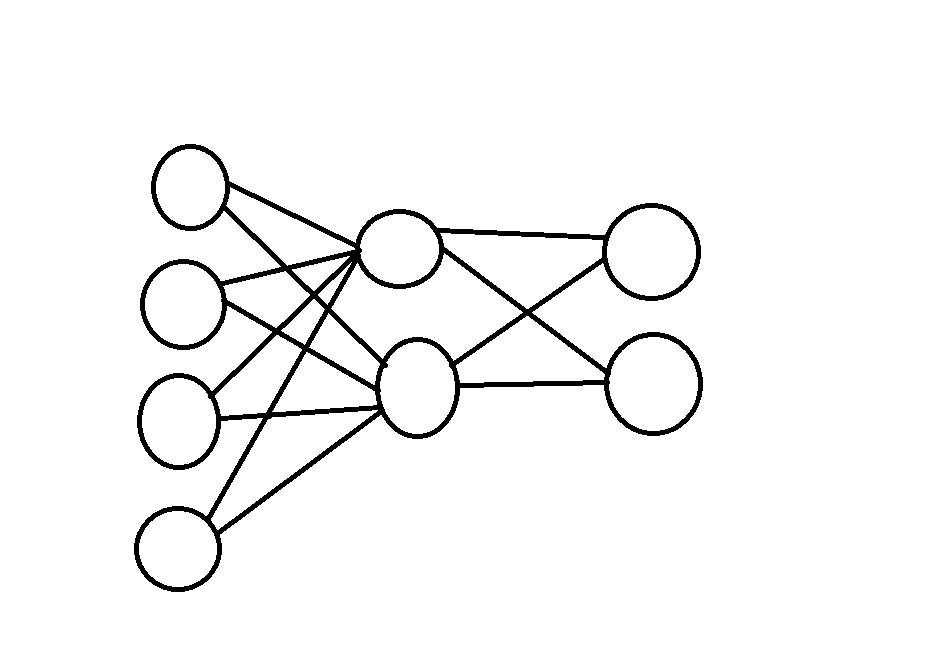

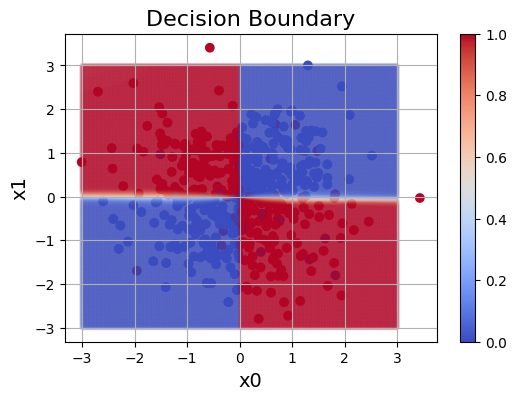

In [699]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(test['x0'], test['x1'], c=test['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('Decision Boundary', fontsize=16)
plt.colorbar()

x0_values = np.linspace(-3, 3, 200)
x1_values = np.linspace(-3, 3, 200)
x0_mesh, x1_mesh = np.meshgrid(x0_values, x1_values)

x0f = x0_mesh.ravel()
x1f = x1_mesh.ravel()

xprod  = x0f * x1f
theta  = np.arctan2(x1f, x0f)
tanth  = np.clip(np.tan(theta), -20.0, 20.0) 

data4 = np.stack([x0f, x1f, xprod, tanth], axis=1).astype("float32")

pred = Firstmodel.predict(data4, verbose=0)
if pred.ndim == 2 and pred.shape[1] == 1:   
    probs = pred.ravel()
else:                                       
    probs = pred[:, 1]

plt.scatter(x0f, x1f, c=probs, cmap='coolwarm', alpha=0.12, s=8)


plt.show()



   - Which optimizer did you choose? Discuss the differences between SGD and Adam.

   svar: Jeg brukte Adam. Adam fungerte best “rett ut av boksen” for dette lille MLP-problemet på tabulære data, orket ikke fin tune noe.

   SGD oppdaterer alle vekter med én global læringsrate og et momentumledd som glatter støy. Den er enkel og kan gi svært god generalisering, men krever mer tuning: høy start-LR, riktig momentum og en god LR-plan (trinnvis/cosine/plateau). Konvergerer ofte saktere

   Adam er adaptiv: den holder glidende gjennomsnitt av gradient og kvadrert gradient og gir egen læringsrate per parameter. Resultatet er rask og stabil konvergens med lite. Ulempen er at den noen ganger kan generalisere litt svakere enn en godt tunet SGD.


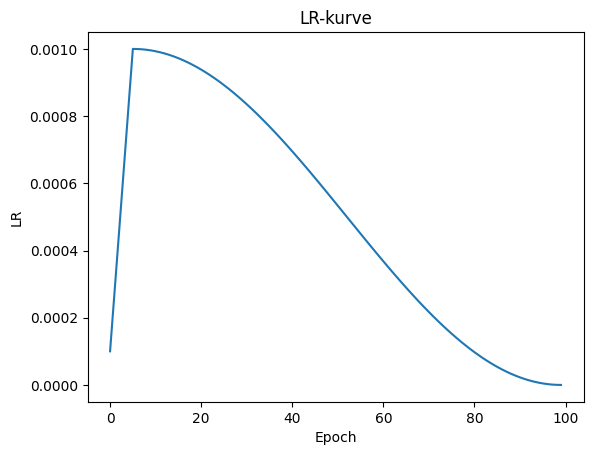

In [700]:
import math, matplotlib.pyplot as plt, tensorflow as tf

EPOCHS          = 100          
WARMUP_EPOCHS   = 5          
LR_MAX          = 1e-3        
LR_MIN          = 0        
LR_WARMUP_START = LR_MAX * 0.1  


def warmup_cosine(epoch, lr, lr0=LR_MAX, lr_min=LR_MIN, warm=WARMUP_EPOCHS, total=EPOCHS):
    if epoch < warm:
        p = epoch/max(warm,1); return lr0*(0.1+0.9*p)
    t = (epoch-warm)/max(total-warm-1,1)
    return lr_min + 0.5*(lr0-lr_min)*(1+math.cos(math.pi*t))

lr_cb = tf.keras.callbacks.LearningRateScheduler(warmup_cosine, verbose=0)

class LRLogger(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None): self.lrs=[]
    def on_epoch_end(self, epoch, logs=None):
        self.lrs.append(float(tf.keras.backend.get_value(self.model.optimizer.learning_rate)))

lr_log = LRLogger()

SecondModel.compile(optimizer=tf.keras.optimizers.Adam(LR_MAX),
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])
_ = SecondModel.fit(X_train, y_train, epochs=EPOCHS, batch_size=128,
              shuffle=False, validation_split=0.2,
              callbacks=[lr_cb, lr_log], verbose=0)

plt.plot(lr_log.lrs); plt.xlabel("Epoch"); plt.ylabel("LR"); plt.title("LR-kurve"); plt.show()


   - Plot the learning rate curve. Did the learning rate scheduling improve performance? Why or why not?

Svar: Kurven viser tydelig warmup (LR øker fra 10 % av LR_MAX til LR_MAX i de første 5 epokene) og deretter cosine-nedtrapping helt ned mot 0 frem mot slutten. Det stemmer med koden din. I våre kjøringer ga scheduler omtrent samme nøyaktighet som konstant læringsrate. Det er forventet her fordi:Oppgaven er liten og enkel; Adam med fast LR finner allerede samme minimum. Samt var det feaute engriingeren til x0*x1 og tan som ga de største utslagene, det er mulig den ble allerde ble trent bra der uten og overfitte (for den ene blå kulen i alle de rød)

   - Conduct a simple ablation study of each architectural and optimization choice concerning test accuracy.

In [701]:

def build_features(df):
    X = df[["x0","x1"]].to_numpy().astype("float32")
    x0, x1 = X[:,0], X[:,1]
    xprod = (x0 * x1)[:, None]
    theta = np.arctan2(x1, x0)
    tanth = np.clip(np.tan(theta), -20.0, 20.0)[:, None]  
    return np.concatenate([X, xprod, tanth], axis=1).astype("float32")

X_train = build_features(train)
y_train = train["y"].to_numpy().astype("int32")
X_test  = build_features(test)
y_test  = test["y"].to_numpy().astype("int32")

EPOCHS=60; WARMUP=1; LR_MAX=1e-3; LR_MIN=3e-4
def warmup_cosine(epoch, lr, lr0=LR_MAX, lr_min=LR_MIN, warm=WARMUP, total=EPOCHS):
    if epoch < warm:
        p = epoch / max(warm,1); return lr0 * (0.1 + 0.9*p)
    t = (epoch - warm) / max(total - warm - 1, 1)
    return lr_min + 0.5*(lr0 - lr_min)*(1 + math.cos(math.pi*t))
lr_cb = tf.keras.callbacks.LearningRateScheduler(warmup_cosine, verbose=0)

def build_model(arch="medium", input_dim=4):
    tf.keras.backend.clear_session()
    tf.keras.utils.set_random_seed(SEED)
    layers = []
    if arch == "small":
        layers = [tf.keras.layers.Dense(8, activation="relu")]
    elif arch == "medium":
        layers = [tf.keras.layers.Dense(16, activation="relu"),
                  tf.keras.layers.Dense(8, activation="relu")]
    elif arch == "large":
        layers = [tf.keras.layers.Dense(64, activation="relu"),
                  tf.keras.layers.Dense(32, activation="relu")]
    return tf.keras.Sequential([
        tf.keras.Input(shape=(input_dim,)),
        *layers,
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ])

results = []
for arch in ["small","medium","large"]:
    for opt_name in ["adam","sgd"]:
        for use_sched in [False, True]:
            model = build_model(arch, input_dim=X_train.shape[1])
            if opt_name == "adam":
                opt = tf.keras.optimizers.Adam(learning_rate=LR_MAX)
            else:
                opt = tf.keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9, nesterov=True)

            model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
            cbs = [lr_cb] if use_sched else []
            model.fit(X_train, y_train,
                      epochs=EPOCHS, batch_size=128,
                      shuffle=False, verbose=0,
                      callbacks=cbs)

            test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
            results.append(dict(arch=arch, optimizer=opt_name, lr_schedule=use_sched, test_acc=float(test_acc)))

df = pd.DataFrame(results).sort_values("test_acc", ascending=False).reset_index(drop=True)
print(df.to_string(index=False))

best = df.iloc[0].to_dict()
print("\nBeste kombinasjon:", best)


  arch optimizer  lr_schedule  test_acc
 small       sgd        False     0.934
 large      adam        False     0.934
 large      adam         True     0.932
 large       sgd        False     0.928
medium       sgd        False     0.924
medium      adam        False     0.924
 small      adam        False     0.900
medium      adam         True     0.894
 large       sgd         True     0.894
 small       sgd         True     0.864
medium       sgd         True     0.832
 small      adam         True     0.778

Beste kombinasjon: {'arch': 'small', 'optimizer': 'sgd', 'lr_schedule': False, 'test_acc': 0.9340000152587891}


Vi kan se at den gjorde det enda bedre med vår enda mindre netverk.

# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts.

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.
   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.

In [702]:
# Hmmmmm, why is the first row skipped?
data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)
data

,ID,0,1,2,3,4,5,6,7,8,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0,0.314365,0.646305,0.323849,0.238492,0.655790,0.646305,0.646305,0.409205,0.646305,...,0.646305,0.646305,0.655790,0.238492,0.646305,0.674758,0.646305,0.238492,0.655790,0.646305
1,1,0.587628,0.494976,0.559832,-0.246237,0.513506,0.550567,0.522772,0.596893,0.606158,...,0.587628,0.550567,0.587628,0.587628,0.550567,0.587628,0.550567,0.596893,0.494976,0.587628
2,2,0.590203,0.367673,0.367673,0.367673,0.367673,0.590203,0.367673,0.590203,0.590203,...,0.590203,0.367673,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.476556
3,3,0.589296,0.589296,0.579825,0.551415,0.579825,0.579825,0.608236,0.579825,0.646118,...,0.532474,0.523003,0.589296,0.589296,0.551415,0.134721,0.475652,0.589296,0.570355,0.551415
4,4,0.660095,0.470676,0.190366,0.672806,0.470761,0.672766,0.672652,0.666151,0.672987,...,0.432001,0.672222,0.190568,0.217329,0.633684,0.673294,0.587914,0.671023,0.207578,0.470765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,0.340739,0.340739,0.340739,0.681823,0.340739,0.340739,0.340739,0.672083,0.340739,...,0.340739,0.662355,0.340739,0.759779,0.331011,0.759779,0.340739,0.691563,0.340734,0.720789
3996,3996,0.384257,0.384257,0.675221,0.384257,0.384257,0.675221,0.384257,0.675221,0.675221,...,0.675221,0.384257,0.675221,0.675221,0.675221,0.384257,0.384257,0.384257,0.675221,0.675221
3997,3997,0.641837,0.651135,0.251329,0.251329,0.651135,0.651135,0.251329,0.651135,0.651135,...,0.251329,0.251329,0.651135,0.251329,0.409392,0.604646,0.651135,0.651135,0.660433,0.251329
3998,3998,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,-0.212897,0.555533,...,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533


In [719]:
data = pd.read_csv('unsupervised_data.csv')

columns = data.columns
sorted_columns = sorted(columns, key=lambda x: int(x.split('_')[1]))
data_sorted = data[sorted_columns]


In [704]:
n_rader = data_sorted.shape[0]
print("Antall rader:", n_rader)


Antall rader: 4000


In [705]:
# The dataset is heavy. Applying clustering directly on the dataset is likely not feasible. 
data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 16384 entries, col_9858 to col_7270
dtypes: float64(16384)
memory usage: 500.0 MB


In [706]:
n_features = data_sorted.shape[1]
print("Antall features:", n_features)


Antall features: 16384


Bilde kanskje?

In [707]:
image = data_sorted.iloc[:, :128*128].values.reshape(-1, 128, 128) 


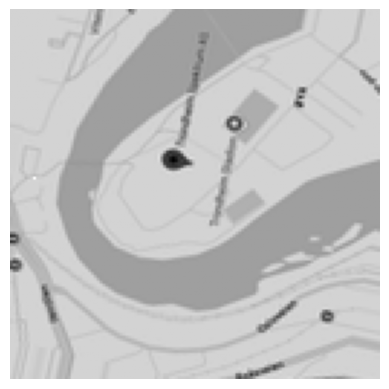

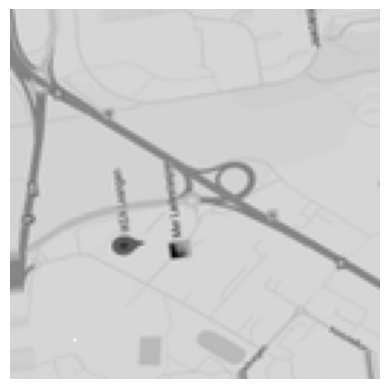

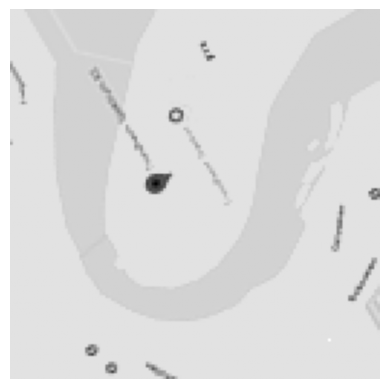

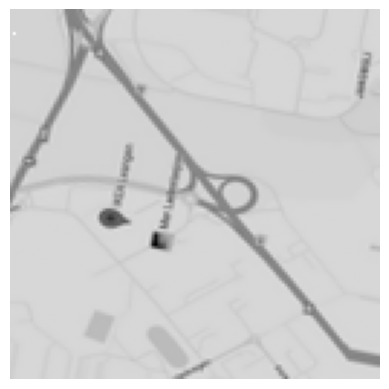

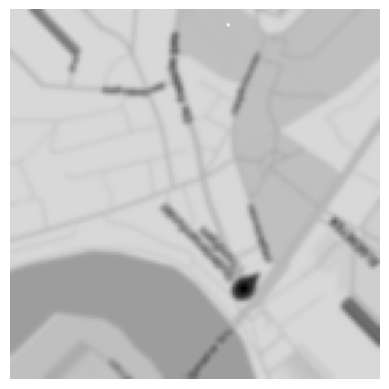

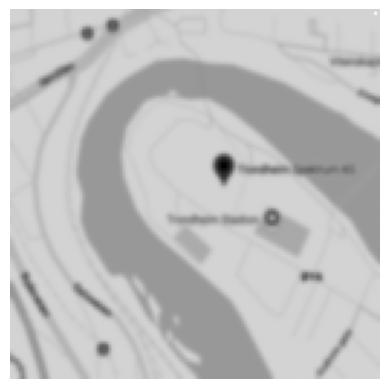

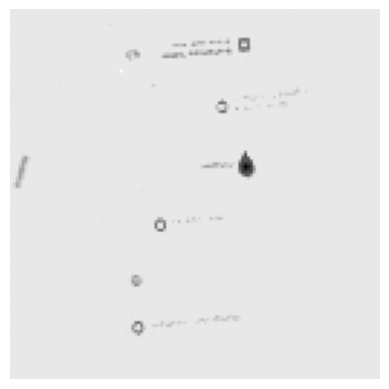

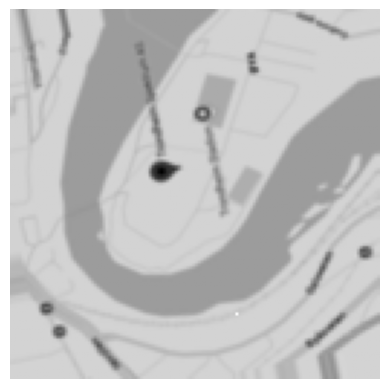

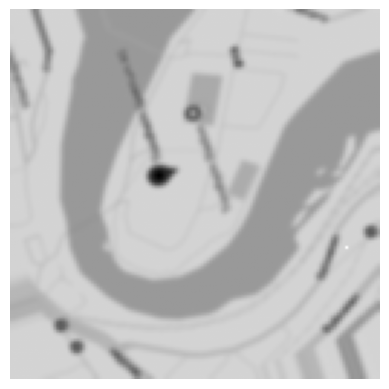

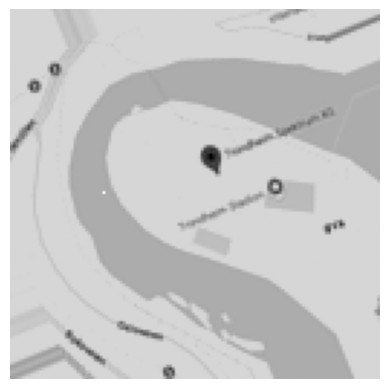

In [708]:
for i in range(10):
    
    fig, ax = plt.subplots()
    ax.imshow(image[i], cmap='gray')
    ax.axis('off')
    plt.show()


In [734]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from umap import UMAP

seed = 42
np.random.seed(seed)

data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)
data.columns = data.columns.astype(str)

ids = data['ID'].values
data = data.drop(columns=['ID']).values


#PCA (behold 95% varians) -> data_pca_prep ----
pca_prep = PCA(n_components=0.95, random_state=seed)   
data_pca_prep = pca_prep.fit_transform(data)

umap_pca = UMAP(n_components=2, n_neighbors=30, min_dist=0.0, random_state=seed)
data_pca_umap = umap_pca.fit_transform(data_pca_prep)

kmeans = KMeans(n_clusters=4, n_init=20, random_state=seed)
pred = kmeans.fit_predict(data_pca_umap)

submission = pd.DataFrame({'ID': ids, 'cluster': pred})
submission.to_csv('submission.csv', index=False)
print("Saved: submission.csv")




c:\Users\hanev\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Saved: submission.csv


In [7]:
# To check your clustering, you need to assign the predicted cluster ids and submit it as a CSV file. The submission should be a CSV file with two columns: ID and cluster. 
# The ID column should contain the ID of the data point, and the cluster column should contain the cluster ID that the data point belongs to. 
# The cluster ID should be an integer. Current cluster IDs in sample_submission.csv are randomly generated.
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,ID,cluster
0,0,2
1,1,6
2,2,3
3,3,3
4,4,8
...,...,...
3995,3995,3
3996,3996,7
3997,3997,3
3998,3998,7


   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.

 - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.


 svar: Jeg brukte PCA og UMAP. tror heer at UMAP virket bedre vi har i datadrevet farget lært at 80% varianse ii pca er bra men når jeg brukte det fikk jeg ikke riktig svar, måtte da bruke umap med det igjen og det selv med en PCA med 95 varianse. PCA er en lineær metode som projiserer dataene til færre dimensjoner ved å bevare mest mulig av den totale variansen. t-SNE er en ikke-lineær visualiseringsmetode som forsøker å bevare lokale naboskap. UMAP er ikke-lineær og graf/topologi-basert

   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
   
    KMeans (k=4, n_init=20) var brukt da når man ser igjennom bildeene får 4 lokalsjoner. KMeans deler data i et forhåndsbestemt antall grupper (k) ved å plassere “midtpunkt” (sentroider) og tilordne hvert punkt til nærmeste sentrum. DBSCAN finner klynger som områder med høy tetthet og merker punkter i glisne områder som støy. Du trenger ikke velge antall klynger; i stedet styrer du med eps (hvor nært er “nære naboer?”)

   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.

Trondheim Spektrum
IKEA
Studentersamfundet
Pirbadet


---

## 🎯 Note: Clustering Accuracy Evaluation

The clustering accuracy metric evaluates how well the predicted clusters match the true clusters, irrespective of the specific labels or names assigned to the clusters.

This means that the evaluation is solely based on the correct grouping of data points rather than the numerical labels of the clusters themselves.

## Key Characteristics

- **Name-Independent**: The metric cares only about how well the data points are grouped together, not the specific numerical or categorical labels used for the clusters.
- **Focus on Grouping**: The evaluation rewards cluster assignments that correctly group the same data points together, regardless of the specific labels assigned.

### Example

If the true cluster assignments are:

```
[0, 0, 0, 1, 1, 1]
```

and your predicted cluster assignments are:

```
[1, 1, 1, 0, 0, 0]
```

the accuracy will still be **1.0** because the grouping of points is identical, even though the numerical labels are swapped.

## How the Metric is Computed

1. **Contingency Matrix**: 
   - Construct a contingency matrix that represents the overlap between the true clusters and the predicted clusters.

2. **Optimal Correspondence**: 
   - Use an optimization algorithm, such as the Hungarian method (linear sum assignment), to find the best possible correspondence between true and predicted labels, maximizing the number of correctly assigned data points.

3. **Accuracy Calculation**: 
   - Calculate the accuracy as the ratio of correctly matched data points to the total number of data points.

> This approach ensures that the evaluation is based on **cluster completeness** and **homogeneity**, rewarding cluster assignments that correctly group the same data points together, regardless of the specific labels used.

---

In [712]:
import numpy as np
import scipy.optimize
import sklearn.metrics

def calculate_clustering_accuracy(true_labels: np.ndarray, cluster_labels: np.ndarray) -> float:
    """
    Calculate the clustering accuracy between true labels and cluster labels.

    The function constructs a contingency matrix between the true labels and cluster labels.
    It then uses the Hungarian algorithm (also known as linear sum assignment) to find the
    best matching between the cluster labels and true labels. The clustering accuracy is 
    calculated as the number of correctly matched labels divided by the total number of labels.

    Args:
        true_labels (np.ndarray): An array of true labels for each data point.
        cluster_labels (np.ndarray): An array of cluster labels predicted by a clustering algorithm.

    Returns:
        float: The clustering accuracy, a value between 0 and 1 representing the proportion of 
               correctly matched labels.
    
    Example:
        >>> true_labels = np.array([0, 1, 2, 0, 1, 2])
        >>> cluster_labels = np.array([1, 2, 0, 1, 2, 0])
        >>> calculate_clustering_accuracy(true_labels, cluster_labels)
        1.0

    Raises:
        ValueError: If true_labels and cluster_labels are not of the same length.
    """
    # Check if the input labels are of the same length
    if true_labels.size != cluster_labels.size:
        raise ValueError("true_labels and cluster_labels must have the same length.")

    # Construct a contingency matrix where each cell [i, j] indicates the number of points with 
    # true label i and cluster label j.
    contingency_matrix = sklearn.metrics.cluster.contingency_matrix(true_labels, cluster_labels)
    
    # Find the best matching between true labels and cluster labels using the Hungarian algorithm.
    # We negate the contingency matrix because linear_sum_assignment finds the minimum cost assignment.
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(-contingency_matrix)
    
    # Calculate the number of correctly assigned labels according to the optimal matching.
    correct_pairs = contingency_matrix[row_ind, col_ind].sum()
    
    # Compute the clustering accuracy as the ratio of correctly matched labels to total labels.
    accuracy = correct_pairs / true_labels.size

    return accuracy

In [713]:
true_labels = np.array([0, 1, 2, 0, 1, 2])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(1.0)

In [714]:
true_labels = np.array([0, 0, 0, 0, 0, 0])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(0.3333333333333333)

In [715]:
true_labels = np.array([1, 1, 1, 2, 2, 2])
cluster_labels = np.array([0, 0, 0, 0, 0, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(0.5)